# EDA & Describe

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics
from catboost import CatBoostClassifier 

In [13]:
df = pd.read_csv("../data/train_with_features.csv")
df_genres =  pd.read_csv("../data/genres.csv")

In [14]:
df.head()

,song_id,filename,filepath,genre_id,genre,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,...,Spectral_contrast_1,Spectral_contrast_2,Spectral_contrast_3,Spectral_contrast_4,Spectral_contrast_5,Spectral_contrast_6,Spectral_contrast_7,Zero_crossing_rate,Spectral_Rolloff,Tempo
0,10150.0,010150.ogg,7/10150.wav,7.0,Instrumental,-211.066559,100.593956,42.598457,23.165283,2.860841,...,21.386073,15.048431,19.512610,18.882236,18.863038,18.122647,32.015794,0.077645,5338.702237,99.384014
1,7358.0,007358.ogg,2/7358.wav,2.0,Punk,-14.467098,99.263069,-2.664984,26.246733,2.537334,...,19.588156,15.563457,14.650135,15.127776,14.944055,15.950120,32.152157,0.089975,4993.001050,129.199219
2,20573.0,020573.ogg,5/20573.wav,5.0,Folk,-317.806274,90.202530,-36.330082,18.486454,-25.418125,...,20.266996,23.585947,26.534958,28.264729,27.093563,28.284045,29.978877,0.084341,3569.498962,143.554688
3,11170.0,011170.ogg,12/11170.wav,12.0,Old-Time / Historic,-264.162598,143.274414,-109.257156,-26.363281,-6.620979,...,14.096315,24.104490,21.017506,21.392954,24.337095,36.129121,29.047427,0.135823,2340.874012,143.554688
4,16662.0,016662.ogg,1/16662.wav,1.0,Rock,2.097910,85.692604,-1.235375,24.334158,1.336215,...,20.933786,14.613464,16.905879,17.289535,17.331272,16.129306,33.096209,0.125767,5761.316079,89.102909


In [15]:
df_genres

,genre,genre_id
0,Electronic,0
1,Rock,1
2,Punk,2
3,Experimental,3
4,Hip-Hop,4
5,Folk,5
6,Chiptune / Glitch,6
7,Instrumental,7
8,Pop,8
9,International,9


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19896 entries, 0 to 19895
Data columns (total 47 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   song_id              19896 non-null  float64
 1   filename             19896 non-null  object 
 2   filepath             19896 non-null  object 
 3   genre_id             19896 non-null  float64
 4   genre                19896 non-null  object 
 5   MFCC_1               19896 non-null  float64
 6   MFCC_2               19896 non-null  float64
 7   MFCC_3               19896 non-null  float64
 8   MFCC_4               19896 non-null  float64
 9   MFCC_5               19896 non-null  float64
 10  MFCC_6               19896 non-null  float64
 11  MFCC_7               19896 non-null  float64
 12  MFCC_8               19896 non-null  float64
 13  MFCC_9               19896 non-null  float64
 14  MFCC_10              19896 non-null  float64
 15  MFCC_11              19896 non-null 

# Medias

In [ ]:
df["MFCC_mean"] = df[[col for col in df.columns if "MFCC" in col]].mean(axis=1)
df["Chroma_mean"] = df[[col for col in df.columns if "Chroma" in col]].mean(axis=1)
df["Spectral_contrast_mean"] = df[[col for col in df.columns if "Spectral_contrast" in col]].mean(axis=1)
df.head()


,song_id,filename,filepath,genre_id,genre,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,...,Spectral_contrast_4,Spectral_contrast_5,Spectral_contrast_6,Spectral_contrast_7,Zero_crossing_rate,Spectral_Rolloff,Tempo,MFCC_mean,Chroma_mean,Spectral_contrast_mean
0,10150.0,010150.ogg,7/10150.wav,7.0,Instrumental,-211.066559,100.593956,42.598457,23.165283,2.860841,...,18.882236,18.863038,18.122647,32.015794,0.077645,5338.702237,99.384014,-1.243691,0.384480,20.547261
1,7358.0,007358.ogg,2/7358.wav,2.0,Punk,-14.467098,99.263069,-2.664984,26.246733,2.537334,...,15.127776,14.944055,15.950120,32.152157,0.089975,4993.001050,129.199219,5.585260,0.455360,18.282265
2,20573.0,020573.ogg,5/20573.wav,5.0,Folk,-317.806274,90.202530,-36.330082,18.486454,-25.418125,...,28.264729,27.093563,28.284045,29.978877,0.084341,3569.498962,143.554688,-19.520457,0.225864,26.287016
3,11170.0,011170.ogg,12/11170.wav,12.0,Old-Time / Historic,-264.162598,143.274414,-109.257156,-26.363281,-6.620979,...,21.392954,24.337095,36.129121,29.047427,0.135823,2340.874012,143.554688,-19.648817,0.207490,24.303558
4,16662.0,016662.ogg,1/16662.wav,1.0,Rock,2.097910,85.692604,-1.235375,24.334158,1.336215,...,17.289535,17.331272,16.129306,33.096209,0.125767,5761.316079,89.102909,5.568545,0.416584,19.471350


In [20]:
df["genre"].value_counts()

genre
Rock                   3093
Electronic             3071
Punk                   2582
Experimental           1798
Hip-Hop                1753
Folk                   1214
Chiptune / Glitch      1181
Instrumental           1043
Pop                     945
International           813
Ambient Electronic      794
Classical               495
Old-Time / Historic     408
Jazz                    305
Country                 142
Soul-RnB                 94
Spoken                   94
Blues                    58
Easy Listening           13
Name: count, dtype: int64

In [ ]:
# Agrupar los generos en 4 grandes categorias

genre_mapping = {
    'Electronic': 'Géneros Electrónicos y Experimentales',
    'Ambient Electronic': 'Géneros Electrónicos y Experimentales',
    'Chiptune / Glitch': 'Géneros Electrónicos y Experimentales',
    'Experimental': 'Géneros Electrónicos y Experimentales',
    'Instrumental': 'Géneros Electrónicos y Experimentales',
    
    'Rock': 'Géneros de Música Popular',
    'Pop': 'Géneros de Música Popular',
    'Punk': 'Géneros de Música Popular',
    'Soul-RnB': 'Géneros de Música Popular',
    'Blues': 'Géneros de Música Popular',
    'Easy Listening': 'Géneros de Música Popular',
    
    'Classical': 'Géneros Clásicos y Tradicionales',
    'Folk': 'Géneros Clásicos y Tradicionales',
    'Country': 'Géneros Clásicos y Tradicionales',
    'Old-Time / Historic': 'Géneros Clásicos y Tradicionales',
    'Jazz': 'Géneros Clásicos y Tradicionales',
    
    'Hip-Hop': 'Géneros Urbanos y Globales',
    'International': 'Géneros Urbanos y Globales',
    'Spoken': 'Géneros Urbanos y Globales',
}

df['genre_group'] = df['genre'].map(genre_mapping)

df.head()

,song_id,filename,filepath,genre_id,genre,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,...,Spectral_contrast_5,Spectral_contrast_6,Spectral_contrast_7,Zero_crossing_rate,Spectral_Rolloff,Tempo,MFCC_mean,Chroma_mean,Spectral_contrast_mean,genre_group
0,10150.0,010150.ogg,7/10150.wav,7.0,Instrumental,-211.066559,100.593956,42.598457,23.165283,2.860841,...,18.863038,18.122647,32.015794,0.077645,5338.702237,99.384014,-1.243691,0.384480,20.547261,Géneros Electrónicos y Experimentales
1,7358.0,007358.ogg,2/7358.wav,2.0,Punk,-14.467098,99.263069,-2.664984,26.246733,2.537334,...,14.944055,15.950120,32.152157,0.089975,4993.001050,129.199219,5.585260,0.455360,18.282265,Géneros de Música Popular
2,20573.0,020573.ogg,5/20573.wav,5.0,Folk,-317.806274,90.202530,-36.330082,18.486454,-25.418125,...,27.093563,28.284045,29.978877,0.084341,3569.498962,143.554688,-19.520457,0.225864,26.287016,Géneros Clásicos y Tradicionales
3,11170.0,011170.ogg,12/11170.wav,12.0,Old-Time / Historic,-264.162598,143.274414,-109.257156,-26.363281,-6.620979,...,24.337095,36.129121,29.047427,0.135823,2340.874012,143.554688,-19.648817,0.207490,24.303558,Géneros Clásicos y Tradicionales
4,16662.0,016662.ogg,1/16662.wav,1.0,Rock,2.097910,85.692604,-1.235375,24.334158,1.336215,...,17.331272,16.129306,33.096209,0.125767,5761.316079,89.102909,5.568545,0.416584,19.471350,Géneros de Música Popular


In [ ]:
# df_clean = df.drop(columns=['song_id', 'filename', 'filepath','genre', 'genre_id','MFCC_1',
#        'MFCC_2', 'MFCC_3', 'MFCC_4', 'MFCC_5', 'MFCC_6', 'MFCC_7', 'MFCC_8',
#        'MFCC_9', 'MFCC_10', 'MFCC_11', 'MFCC_12', 'MFCC_13', 'MFCC_14',
#        'MFCC_15', 'MFCC_16', 'MFCC_17', 'MFCC_18', 'MFCC_19', 'MFCC_20',
#        'Chroma_1', 'Chroma_2', 'Chroma_3', 'Chroma_4', 'Chroma_5', 'Chroma_6',
#        'Chroma_7', 'Chroma_8', 'Chroma_9', 'Chroma_10', 'Chroma_11',
#        'Chroma_12', 'Spectral_contrast_1', 'Spectral_contrast_2',
#        'Spectral_contrast_3', 'Spectral_contrast_4', 'Spectral_contrast_5',
#        'Spectral_contrast_6', 'Spectral_contrast_7'])

# df_clean.head()

,Zero_crossing_rate,Spectral_Rolloff,Tempo,MFCC_mean,Chroma_mean,Spectral_contrast_mean,genre_group
0,0.077645,5338.702237,99.384014,-1.243691,0.384480,20.547261,Géneros Electrónicos y Experimentales
1,0.089975,4993.001050,129.199219,5.585260,0.455360,18.282265,Géneros de Música Popular
2,0.084341,3569.498962,143.554688,-19.520457,0.225864,26.287016,Géneros Clásicos y Tradicionales
3,0.135823,2340.874012,143.554688,-19.648817,0.207490,24.303558,Géneros Clásicos y Tradicionales
4,0.125767,5761.316079,89.102909,5.568545,0.416584,19.471350,Géneros de Música Popular


In [27]:
df_clean.describe()

,Zero_crossing_rate,Spectral_Rolloff,Tempo,MFCC_mean,Chroma_mean,Spectral_contrast_mean
count,19896.000000,19896.000000,19896.000000,19896.000000,19896.000000,19896.000000
mean,0.089358,4167.355487,120.311502,0.111029,0.391251,20.629919
std,0.047631,1620.235004,29.184974,6.812962,0.094266,2.206555
min,0.000000,0.000000,0.000000,-56.568555,0.000000,0.000000
25%,0.057199,3004.747827,99.384014,-3.023993,0.324385,19.167779
50%,0.082599,4230.090171,117.453835,1.790760,0.391362,20.238864
75%,0.112040,5307.557197,135.999178,4.908235,0.453922,21.785130
max,0.759138,9965.761556,287.109375,14.326897,0.814816,35.675973


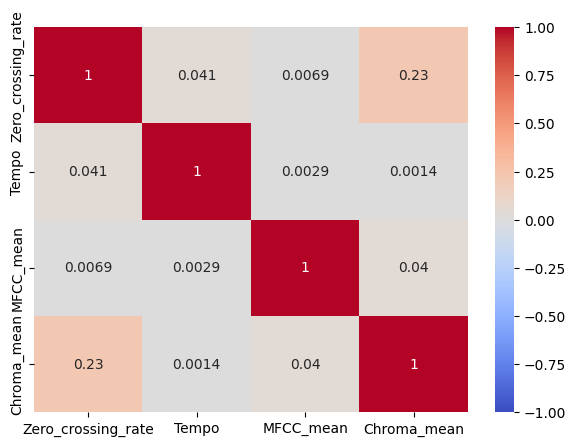

In [38]:
plt.figure(figsize=(7,5))
sns.heatmap(df_clean.drop(columns=["Spectral_contrast_mean", "Spectral_Rolloff"]).corr(numeric_only=True),annot=True, cmap="coolwarm", vmin=-1);

In [39]:
label_encoder = LabelEncoder()

df_clean['genre_group_encoded'] = label_encoder.fit_transform(df_clean['genre_group'])

In [83]:
df_clean

,Zero_crossing_rate,Spectral_Rolloff,Tempo,MFCC_mean,Chroma_mean,Spectral_contrast_mean,genre_group,genre_group_encoded
0,0.077645,5338.702237,99.384014,-1.243691,0.384480,20.547261,Géneros Electrónicos y Experimentales,1
1,0.089975,4993.001050,129.199219,5.585260,0.455360,18.282265,Géneros de Música Popular,3
2,0.084341,3569.498962,143.554688,-19.520457,0.225864,26.287016,Géneros Clásicos y Tradicionales,0
3,0.135823,2340.874012,143.554688,-19.648817,0.207490,24.303558,Géneros Clásicos y Tradicionales,0
4,0.125767,5761.316079,89.102909,5.568545,0.416584,19.471350,Géneros de Música Popular,3
...,...,...,...,...,...,...,...,...
19891,0.052306,2238.895227,89.102909,3.274758,0.330205,23.061864,Géneros Electrónicos y Experimentales,1
19892,0.090514,6210.928026,129.199219,3.291707,0.460668,20.186146,Géneros Urbanos y Globales,2
19893,0.091335,5365.556289,143.554688,4.302070,0.283541,20.541644,Géneros Urbanos y Globales,2
19894,0.061357,3179.494850,99.384014,0.123629,0.290045,22.323049,Géneros de Música Popular,3


# Todos los valores

In [ ]:
df_clean = df.drop(columns=['song_id', 'filename', 'filepath','genre', 'genre_id'])

df_clean.head()

,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,MFCC_9,MFCC_10,...,Spectral_contrast_2,Spectral_contrast_3,Spectral_contrast_4,Spectral_contrast_5,Spectral_contrast_6,Spectral_contrast_7,Zero_crossing_rate,Spectral_Rolloff,Tempo,genre_group
0,-211.066559,100.593956,42.598457,23.165283,2.860841,18.102251,-14.843862,9.617244,-0.177969,-3.769399,...,15.048431,19.512610,18.882236,18.863038,18.122647,32.015794,0.077645,5338.702237,99.384014,Géneros Electrónicos y Experimentales
1,-14.467098,99.263069,-2.664984,26.246733,2.537334,13.499779,4.049285,13.555771,-2.007490,3.238451,...,15.563457,14.650135,15.127776,14.944055,15.950120,32.152157,0.089975,4993.001050,129.199219,Géneros de Música Popular
2,-317.806274,90.202530,-36.330082,18.486454,-25.418125,-5.020282,-7.958361,-12.780191,-19.428473,-12.838558,...,23.585947,26.534958,28.264729,27.093563,28.284045,29.978877,0.084341,3569.498962,143.554688,Géneros Clásicos y Tradicionales
3,-264.162598,143.274414,-109.257156,-26.363281,-6.620979,-39.883110,-30.219675,-19.228388,-14.329634,-19.195375,...,24.104490,21.017506,21.392954,24.337095,36.129121,29.047427,0.135823,2340.874012,143.554688,Géneros Clásicos y Tradicionales
4,2.097910,85.692604,-1.235375,24.334158,1.336215,9.044332,-8.041906,10.779317,0.022239,5.061773,...,14.613464,16.905879,17.289535,17.331272,16.129306,33.096209,0.125767,5761.316079,89.102909,Géneros de Música Popular


In [ ]:
label_encoder = LabelEncoder()
df_clean['genre_group_encoded'] = label_encoder.fit_transform(df_clean['genre_group'])

In [95]:
df_clean

,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,MFCC_9,MFCC_10,...,Spectral_contrast_3,Spectral_contrast_4,Spectral_contrast_5,Spectral_contrast_6,Spectral_contrast_7,Zero_crossing_rate,Spectral_Rolloff,Tempo,genre_group,genre_group_encoded
0,-211.066559,100.593956,42.598457,23.165283,2.860841,18.102251,-14.843862,9.617244,-0.177969,-3.769399,...,19.512610,18.882236,18.863038,18.122647,32.015794,0.077645,5338.702237,99.384014,Géneros Electrónicos y Experimentales,1
1,-14.467098,99.263069,-2.664984,26.246733,2.537334,13.499779,4.049285,13.555771,-2.007490,3.238451,...,14.650135,15.127776,14.944055,15.950120,32.152157,0.089975,4993.001050,129.199219,Géneros de Música Popular,3
2,-317.806274,90.202530,-36.330082,18.486454,-25.418125,-5.020282,-7.958361,-12.780191,-19.428473,-12.838558,...,26.534958,28.264729,27.093563,28.284045,29.978877,0.084341,3569.498962,143.554688,Géneros Clásicos y Tradicionales,0
3,-264.162598,143.274414,-109.257156,-26.363281,-6.620979,-39.883110,-30.219675,-19.228388,-14.329634,-19.195375,...,21.017506,21.392954,24.337095,36.129121,29.047427,0.135823,2340.874012,143.554688,Géneros Clásicos y Tradicionales,0
4,2.097910,85.692604,-1.235375,24.334158,1.336215,9.044332,-8.041906,10.779317,0.022239,5.061773,...,16.905879,17.289535,17.331272,16.129306,33.096209,0.125767,5761.316079,89.102909,Géneros de Música Popular,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19891,-87.143631,74.217102,13.521238,40.789940,4.044220,4.865625,-6.279844,8.507338,-8.854505,7.405588,...,21.206697,21.811967,24.548786,24.779198,30.913644,0.052306,2238.895227,89.102909,Géneros Electrónicos y Experimentales,1
19892,-179.441696,110.109802,42.764900,28.596037,20.240883,24.409494,1.128626,7.674322,-2.955955,5.223315,...,18.398353,18.637374,19.124881,17.428846,31.813474,0.090514,6210.928026,129.199219,Géneros Urbanos y Globales,2
19893,-18.504133,49.983315,3.499655,24.964241,9.758835,16.736166,4.093640,12.467720,-0.524615,6.833748,...,18.708022,18.588858,16.796088,18.805547,31.293375,0.091335,5365.556289,143.554688,Géneros Urbanos y Globales,2
19894,-119.573891,82.123619,12.488297,51.445694,1.711070,10.580793,-2.954149,3.431639,-5.979878,4.351625,...,20.855689,22.847318,21.514932,19.566042,32.632010,0.061357,3179.494850,99.384014,Géneros de Música Popular,3


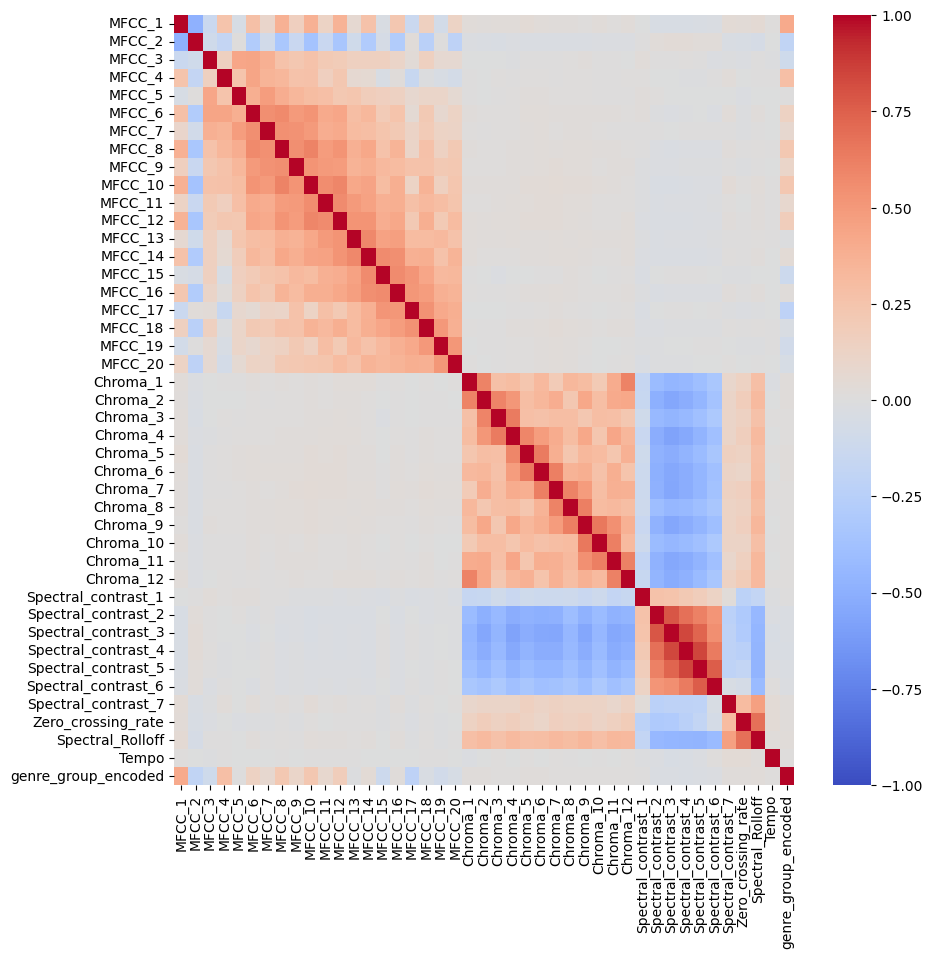

In [98]:
plt.figure(figsize=(10,10))

sns.heatmap(df_clean.drop(columns=['genre_group']).corr(), cmap="coolwarm", vmin=-1);

## RF Drop Zero Crossing Rate Accuracy = 0.62

(15916, 41)
(3980, 41)
(15916,)
(3980,)
Accuracy:  0.621608040201005
              precision    recall  f1-score   support

           0       0.65      0.40      0.49       478
           1       0.58      0.81      0.68      1570
           2       0.81      0.05      0.09       532
           3       0.67      0.70      0.69      1400

    accuracy                           0.62      3980
   macro avg       0.68      0.49      0.49      3980
weighted avg       0.65      0.62      0.58      3980



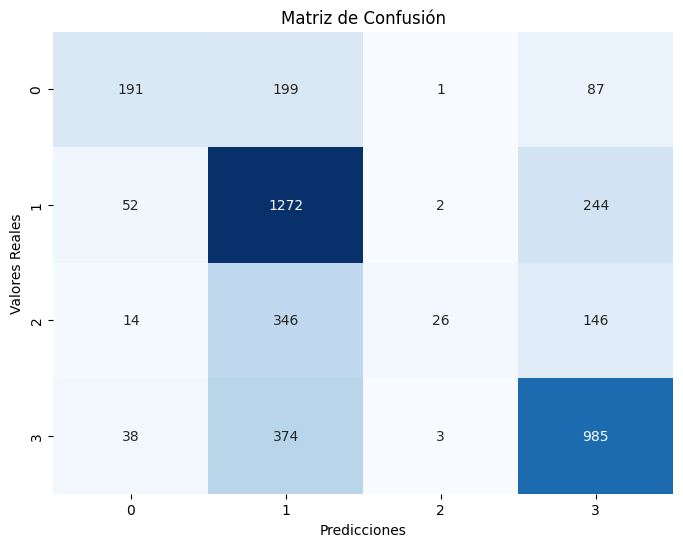

In [140]:
X = df_clean.drop(columns=['Zero_crossing_rate','genre_group', 'genre_group_encoded'])
y = df_clean["genre_group_encoded"]


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=41)


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

scaler = MinMaxScaler()
X_train_scaled =  scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5)

rf.fit(X_train_scaled, y_train)

pred = rf.predict(X_test_scaled)

print("Accuracy: ", metrics.accuracy_score(y_test, pred))
print(metrics.classification_report(y_test, pred))
cm= metrics.confusion_matrix(y_test, pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=True, yticklabels=True)

# Personalizar el gráfico
plt.title("Matriz de Confusión")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.show()

## RF Drop Spectral Rolloff Accuracy = 0.62

(15916, 41)
(3980, 41)
(15916,)
(3980,)
Accuracy:  0.6226130653266332
              precision    recall  f1-score   support

           0       0.64      0.40      0.49       478
           1       0.58      0.81      0.68      1570
           2       0.90      0.05      0.09       532
           3       0.67      0.71      0.69      1400

    accuracy                           0.62      3980
   macro avg       0.70      0.49      0.49      3980
weighted avg       0.66      0.62      0.58      3980



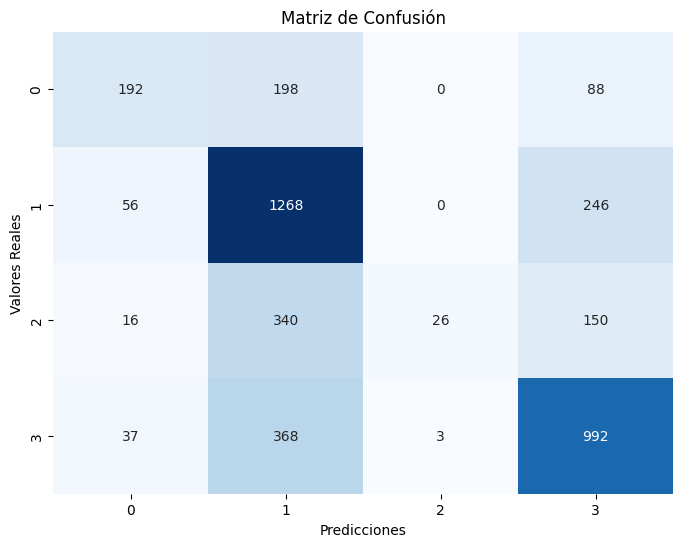

In [138]:
X = df_clean.drop(columns=['Spectral_Rolloff','genre_group', 'genre_group_encoded'])
y = df_clean["genre_group_encoded"]


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=41)


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

scaler = MinMaxScaler()
X_train_scaled =  scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5)

rf.fit(X_train_scaled, y_train)

pred = rf.predict(X_test_scaled)

print("Accuracy: ", metrics.accuracy_score(y_test, pred))
print(metrics.classification_report(y_test, pred))
cm= metrics.confusion_matrix(y_test, pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=True, yticklabels=True)

# Personalizar el gráfico
plt.title("Matriz de Confusión")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.show()

## RF Drop Spectral Rolloff & Zero Crossing  Rate Accuracy = 0.62

(15916, 40)
(3980, 40)
(15916,)
(3980,)
Accuracy:  0.6203517587939699
              precision    recall  f1-score   support

           0       0.64      0.38      0.48       478
           1       0.58      0.81      0.67      1570
           2       0.83      0.05      0.10       532
           3       0.67      0.71      0.69      1400

    accuracy                           0.62      3980
   macro avg       0.68      0.49      0.49      3980
weighted avg       0.65      0.62      0.58      3980



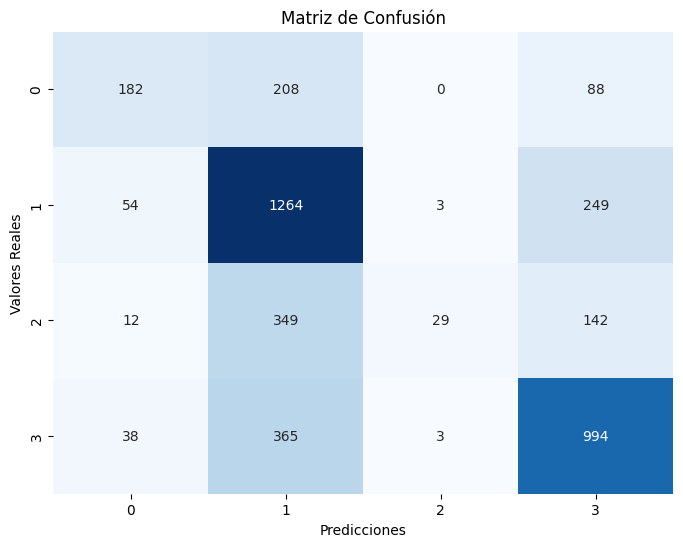

In [141]:
X = df_clean.drop(columns=['Spectral_Rolloff', 'Zero_crossing_rate', 'genre_group', 'genre_group_encoded'])
y = df_clean["genre_group_encoded"]


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=41)


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

scaler = MinMaxScaler()
X_train_scaled =  scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5)

rf.fit(X_train_scaled, y_train)

pred = rf.predict(X_test_scaled)

print("Accuracy: ", metrics.accuracy_score(y_test, pred))
print(metrics.classification_report(y_test, pred))
cm= metrics.confusion_matrix(y_test, pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=True, yticklabels=True)

# Personalizar el gráfico
plt.title("Matriz de Confusión")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.show()

## RF All  Accuracy = 0.61

(15916, 42)
(3980, 42)
(15916,)
(3980,)
Accuracy:  0.6195979899497488
              precision    recall  f1-score   support

           0       0.62      0.38      0.48       478
           1       0.58      0.81      0.67      1570
           2       0.96      0.04      0.08       532
           3       0.68      0.71      0.69      1400

    accuracy                           0.62      3980
   macro avg       0.71      0.49      0.48      3980
weighted avg       0.67      0.62      0.58      3980



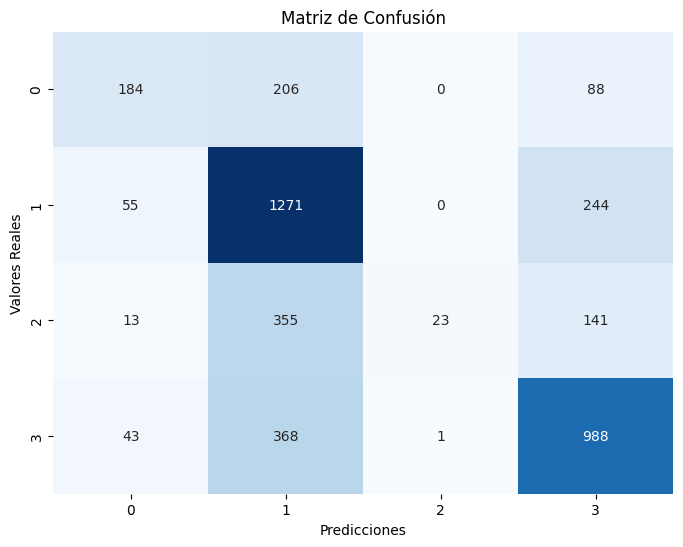

In [137]:
X = df_clean.drop(columns=['genre_group', 'genre_group_encoded'])
y = df_clean["genre_group_encoded"]


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=41)


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

scaler = MinMaxScaler()
X_train_scaled =  scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5)

rf.fit(X_train_scaled, y_train)

pred = rf.predict(X_test_scaled)

print("Accuracy: ", metrics.accuracy_score(y_test, pred))
print(metrics.classification_report(y_test, pred))
cm= metrics.confusion_matrix(y_test, pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=True, yticklabels=True)

# Personalizar el gráfico
plt.title("Matriz de Confusión")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.show()

## RF Drop MFCC Accuracy=0.36

(15916, 22)
(3980, 22)
(15916,)
(3980,)
Accuracy:  0.39095477386934674
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       478
           1       0.39      0.90      0.55      1570
           2       0.00      0.00      0.00       532
           3       0.36      0.10      0.16      1400

    accuracy                           0.39      3980
   macro avg       0.19      0.25      0.18      3980
weighted avg       0.28      0.39      0.27      3980



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

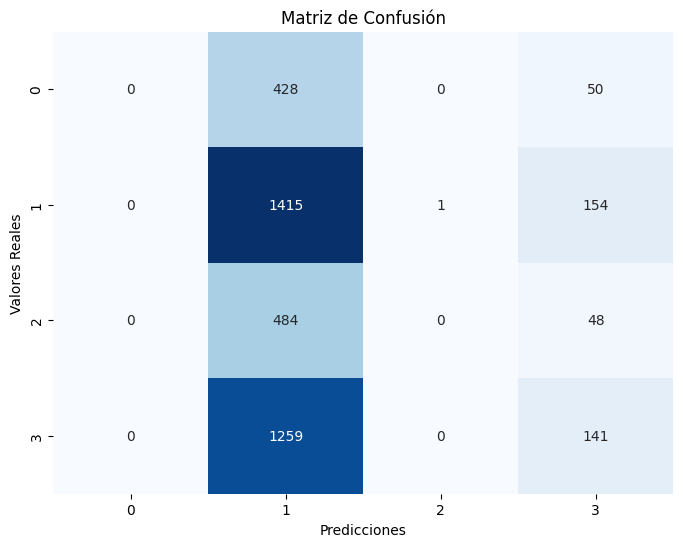

In [135]:
X = df_clean.drop(columns=['MFCC_1', 'MFCC_2', 'MFCC_3', 'MFCC_4', 'MFCC_5', 'MFCC_6', 'MFCC_7',
       'MFCC_8', 'MFCC_9', 'MFCC_10', 'MFCC_11', 'MFCC_12', 'MFCC_13',
       'MFCC_14', 'MFCC_15', 'MFCC_16', 'MFCC_17', 'MFCC_18', 'MFCC_19',
       'MFCC_20', 'genre_group', 'genre_group_encoded'])
y = df_clean["genre_group_encoded"]


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=41)


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

scaler = MinMaxScaler()
X_train_scaled =  scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5)

rf.fit(X_train_scaled, y_train)

pred = rf.predict(X_test_scaled)

print("Accuracy: ", metrics.accuracy_score(y_test, pred))
print(metrics.classification_report(y_test, pred))
cm= metrics.confusion_matrix(y_test, pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=True, yticklabels=True)

# Personalizar el gráfico
plt.title("Matriz de Confusión")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.show()

## RF only MFCC Accuracy=0.63

(15916, 20)
(3980, 20)
(15916,)
(3980,)
Accuracy:  0.6329145728643216
              precision    recall  f1-score   support

           0       0.64      0.43      0.52       478
           1       0.59      0.81      0.68      1570
           2       0.83      0.08      0.15       532
           3       0.68      0.72      0.70      1400

    accuracy                           0.63      3980
   macro avg       0.69      0.51      0.51      3980
weighted avg       0.66      0.63      0.60      3980



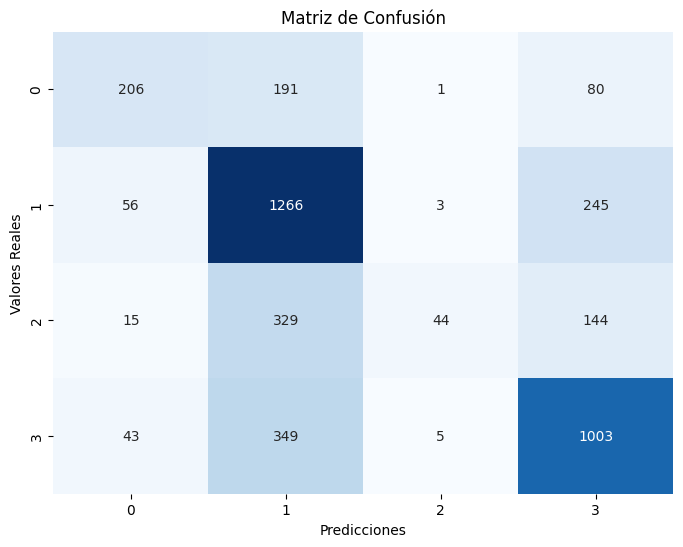

In [147]:
X = df_clean.drop(columns=['Chroma_1', 'Chroma_2', 'Chroma_3', 'Chroma_4', 'Chroma_5',
       'Chroma_6', 'Chroma_7', 'Chroma_8', 'Chroma_9', 'Chroma_10',
       'Chroma_11', 'Chroma_12', 'Spectral_contrast_1', 'Spectral_contrast_2',
       'Spectral_contrast_3', 'Spectral_contrast_4', 'Spectral_contrast_5',
       'Spectral_contrast_6', 'Spectral_contrast_7', 'Zero_crossing_rate',
       'Spectral_Rolloff', 'Tempo', 'genre_group', 'genre_group_encoded'])
y = df_clean["genre_group_encoded"]


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=41)


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

scaler = MinMaxScaler()
X_train_scaled =  scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5)

rf.fit(X_train_scaled, y_train)

pred = rf.predict(X_test_scaled)

print("Accuracy: ", metrics.accuracy_score(y_test, pred))
print(metrics.classification_report(y_test, pred))
cm= metrics.confusion_matrix(y_test, pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=True, yticklabels=True)

# Personalizar el gráfico
plt.title("Matriz de Confusión")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.show()

## RF only MFCC & Chroma & Spectral Contrast Accuracy=0.63

(15916, 39)
(3980, 39)
(15916,)
(3980,)
Accuracy:  0.6238693467336683
              precision    recall  f1-score   support

           0       0.65      0.38      0.48       478
           1       0.58      0.81      0.68      1570
           2       0.88      0.04      0.08       532
           3       0.68      0.72      0.70      1400

    accuracy                           0.62      3980
   macro avg       0.70      0.49      0.48      3980
weighted avg       0.66      0.62      0.58      3980



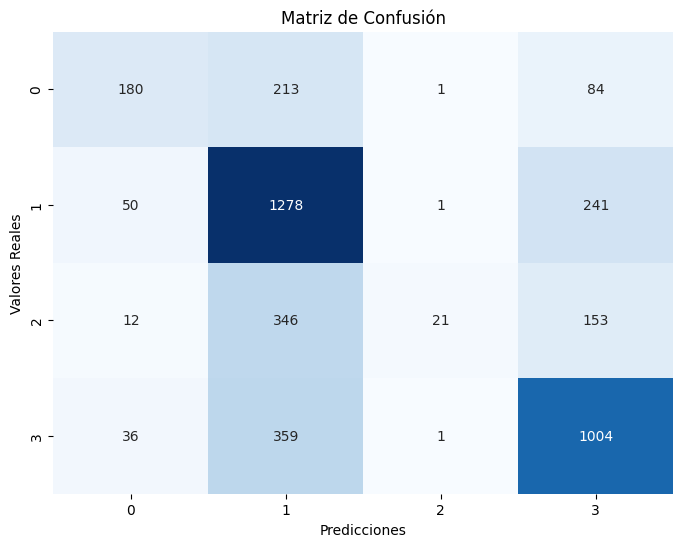

In [150]:
X = df_clean.drop(columns=['Zero_crossing_rate', "Spectral_Rolloff",
       "Tempo",'genre_group', 'genre_group_encoded'])
y = df_clean["genre_group_encoded"]


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=41)


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

scaler = MinMaxScaler()
X_train_scaled =  scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5)

rf.fit(X_train_scaled, y_train)

pred = rf.predict(X_test_scaled)

print("Accuracy: ", metrics.accuracy_score(y_test, pred))
print(metrics.classification_report(y_test, pred))
cm= metrics.confusion_matrix(y_test, pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=True, yticklabels=True)

# Personalizar el gráfico
plt.title("Matriz de Confusión")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.show()